In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [130]:
data = loadmat('/Users/hsunku/Desktop/github/MachineLearning_AndrewNg/exercises/machine-learning-ex6/ex6/ex6data1.mat')
X = data.get('X')
y = data.get('y')

In [151]:
import sklearn.svm as svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import warnings
from sklearn import svm
warnings.filterwarnings('ignore')

In [159]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

svm_model = svm.LinearSVC(C=100,loss='hinge',max_iter=1000)
svm_model.fit(X,y)
pred1 = svm_model.predict(X)
accuracy1 = accuracy_score(y,pred1)
svm_model.score(X,y)
# # get the separating hyperplane
# a = svm_model.intercept_[0]
# w1 = svm_model.coef_[0][0]
# w2 = svm_model.coef_[0][1]
# x1 = np.linspace(0, 5)
# x2 = -(x1*w1 + a)/w2

# plt.figure(figsize=(12,9))
# sns.scatterplot(X[:,0],X[:,1],hue=y[:,0])
# plt.legend(['positive','negative'])
# plt.plot(x1,x2,'r')
# plt.show()
# svm_model.intercept_,svm_model.coef_

# pred2 = svm_model.predict(X_test)
# accuracy2 = accuracy_score(y_test,pred2)
# print(accuracy1,accuracy2,svm_model.intercept_,svm_model.coef_)


0.9411764705882353

In [144]:
svm_model.score(X,y)

0.9803921568627451

In [182]:
raw_data2 = loadmat('/Users/hsunku/Desktop/github/MachineLearning_AndrewNg/exercises/machine-learning-ex6/ex6/ex6data2.mat')
X = raw_data2.get('X')
y = raw_data2.get('y')


In [176]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

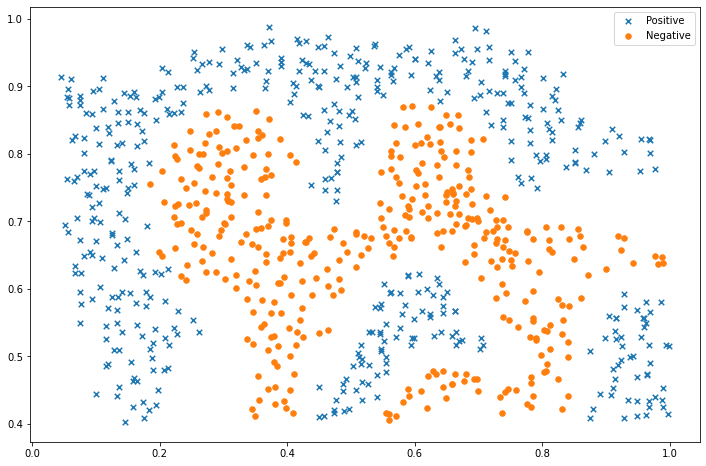

SVC(C=100, gamma=10, probability=True)

In [193]:
data=pd.DataFrame(raw_data2['X'],columns=['X1','X2'])
data['y']=raw_data2['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()
plt.show()
svc = svm.SVC(C=100, gamma=10, probability=True)
svc

In [194]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9698725376593279

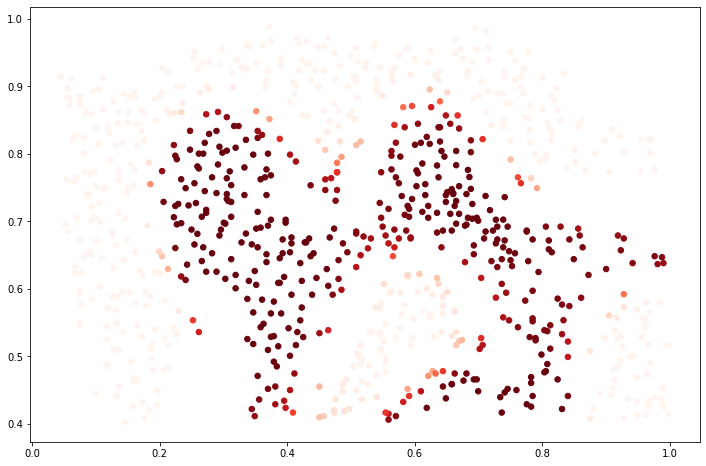

In [199]:
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')
plt.show()

In [196]:
svc.predict_proba(data[['X1', 'X2']])

array([[3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       ...,
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00]])

In [209]:
raw_data3 = loadmat('/Users/hsunku/Desktop/github/MachineLearning_AndrewNg/exercises/machine-learning-ex6/ex6/ex6data3.mat')
X = raw_data3['X']
y = raw_data3['y']
Xval = raw_data3['Xval']
yval = raw_data3['yval']



In [227]:
# best_search = pd.DataFrame()
# best_search['c'] = None
# best_search['gamma'] = None
# best_search['val_accuracy'] = None
count=0
list_=[]
for c in (0.01,0.03,0.1,0.3,1,3,10,30,100):
    for g in (0.01,0.03,0.1,0.3,1,3,10,30,100):
        svm_model = SVC(C=c,gamma=g)
        svm_model.fit(X,y)
        ytrainpred = svm_model.predict(X)
        yvalpred = svm_model.predict(Xval)
        list_.append([c,g,accuracy_score(y,ytrainpred),accuracy_score(yval,yvalpred)])
result=pd.DataFrame(list_,columns=['c','gamma','train_accuracy','val_accuracy'])
result.sort_values('val_accuracy',ascending=False)

,c,gamma,train_accuracy,val_accuracy
69,30.00,10.00,0.938389,0.965
52,3.00,30.00,0.943128,0.965
44,1.00,100.00,0.943128,0.965
35,0.30,100.00,0.952607,0.965
43,1.00,30.00,0.943128,0.960
...,...,...,...,...
19,0.10,0.03,0.502370,0.435
27,0.30,0.01,0.502370,0.435
28,0.30,0.03,0.502370,0.435
1,0.01,0.03,0.502370,0.435


In [272]:
raw_data_spamtrain = loadmat('/Users/hsunku/Desktop/github/MachineLearning_AndrewNg/exercises/machine-learning-ex6/ex6/spamTrain.mat')
raw_data_spamtest = loadmat('/Users/hsunku/Desktop/github/MachineLearning_AndrewNg/exercises/machine-learning-ex6/ex6/spamTest.mat')
X = raw_data_spamtrain['X']
y = raw_data_spamtrain['y']
Xtest = raw_data_spamtest['Xtest']
ytest = raw_data_spamtest['ytest']

svm_model = SVC(C=3,kernel='linear')
svm_model.fit(X,y)
svm_model.score(X,y)


0.99975

In [274]:
svm_model.get_params()

{'C': 3,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [264]:
svm_model.score(X,y)

0.99325

In [273]:
svm_model.score(Xtest,ytest)

0.973